In [112]:
import csv
import pandas as pd
import numpy as np
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

from dataset import load_species
from dataset import df_to_file
from dataset import clean_file

# Global Variables
data_file = "data\EUForestspecies.csv"
location_data = "../models/test.csv"
fp = "../data/borders/Europe_borders.shp"
tree_data = "../models/abiesAlba.csv"
inCoords = "'espg:3035'"
outCoords = "'espg:4326'"

In [113]:
border_data = gpd.read_file(fp)

<AxesSubplot:>

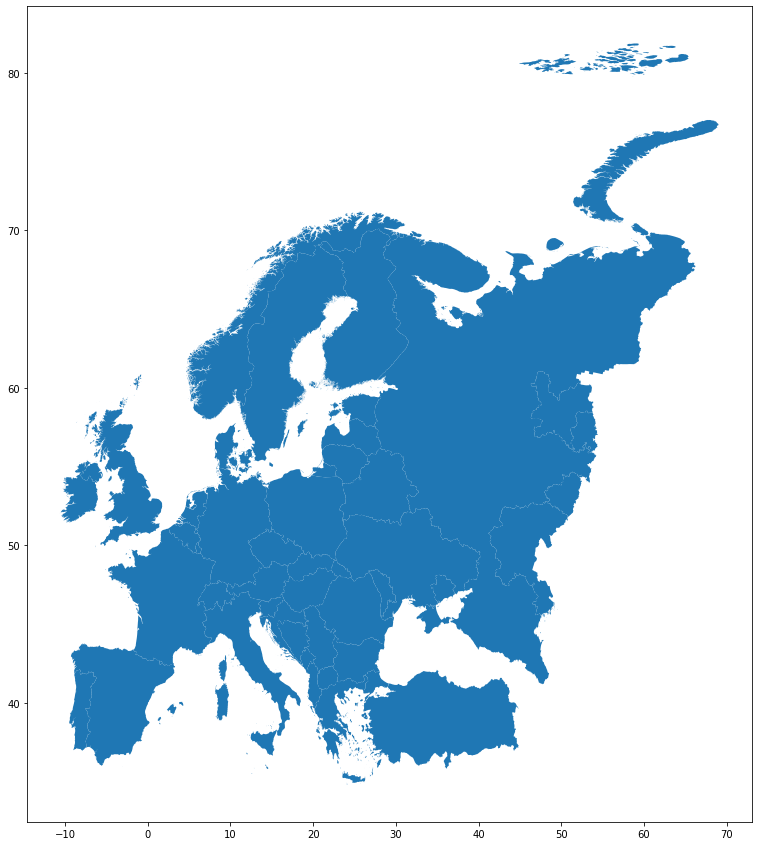

In [114]:
fig, ax = plt.subplots(figsize = (15,15))
border_data.plot(ax = ax)

In [115]:
df = pd.read_csv(tree_data)
crs = 'ESPG:4326'
df.head()

,X,Y,COUNTRY,SPECIES NAME,"""DBH-1""",DBH-2,NFI,FF,BS
0,47.183876,9.795662,Austria,Abies alba,-9999,-9999,-9999,1,-9999
1,47.410551,13.384315,Austria,Abies alba,1,1,1,-9999,-9999
2,47.556834,13.314133,Austria,Abies alba,1,1,1,-9999,-9999
3,47.084708,9.730257,Austria,Abies alba,-9999,1,1,-9999,-9999
4,48.348032,13.906099,Austria,Abies alba,-9999,1,1,-9999,-9999


In [116]:
geometry = [Point(xy) for xy in zip( df["Y"], df["X"])]
geometry[:3]

In [117]:
t_srs = 4326
geo_df = gpd.GeoDataFrame(df, crs=(u'epsg:'+str(t_srs)), geometry=geometry)
geo_df.head()

,X,Y,COUNTRY,SPECIES NAME,"""DBH-1""",DBH-2,NFI,FF,BS,geometry
0,47.183876,9.795662,Austria,Abies alba,-9999,-9999,-9999,1,-9999,POINT (9.79566 47.18388)
1,47.410551,13.384315,Austria,Abies alba,1,1,1,-9999,-9999,POINT (13.38432 47.41055)
2,47.556834,13.314133,Austria,Abies alba,1,1,1,-9999,-9999,POINT (13.31413 47.55683)
3,47.084708,9.730257,Austria,Abies alba,-9999,1,1,-9999,-9999,POINT (9.73026 47.08471)
4,48.348032,13.906099,Austria,Abies alba,-9999,1,1,-9999,-9999,POINT (13.90610 48.34803)


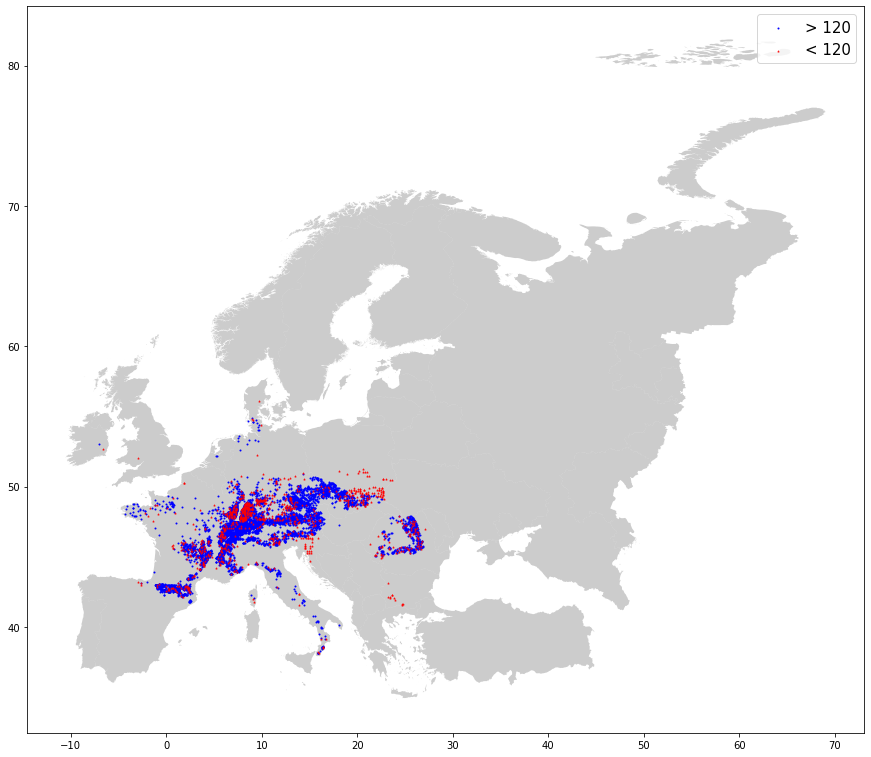

In [118]:
fig, ax = plt.subplots(figsize = (15,15))
border_data.plot(ax =ax, alpha = .4, color = "grey")
geo_df[geo_df["DBH-2"] == 1].plot(ax = ax, markersize = 1, color = "blue", marker = "o", label = "> 120")
geo_df[geo_df["DBH-2"] != 1].plot(ax = ax, markersize = 1, color = "red", marker = "^", label = "< 120")
plt.legend(prop={'size': 15})
